 **1. Dataset description**

I have used the Emission by countries dataset for this experiment. The dataset is consist the polution caused by different fuel source produced by a country in span of many years.

**2. Import libraries**

In [ ]:
import pandas  as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split as split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**3. Import dataset**

In [ ]:
data = '/content/drive/MyDrive/ADS/Emission.csv'

df = pd.read_csv(data)

In [ ]:
df.head()

,Unnamed: 0,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,3232,Australia,AUS,1990,278.154156,141.879819,88.842090,34.454816,3.462872,7.272496,2.242063,16.315938
1,3233,Australia,AUS,1991,279.528510,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767
2,3234,Australia,AUS,1992,284.525345,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502
3,3235,Australia,AUS,1993,288.870537,150.098575,90.386578,35.670002,3.004698,7.136743,2.573941,16.383765
4,3236,Australia,AUS,1994,293.696553,151.376241,91.924087,37.032005,3.484276,6.880148,2.999795,16.494706


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1619 non-null   int64  
 1   Country             1619 non-null   object 
 2   ISO 3166-1 alpha-3  1619 non-null   object 
 3   Year                1619 non-null   int64  
 4   Total               1619 non-null   float64
 5   Coal                1619 non-null   float64
 6   Oil                 1619 non-null   float64
 7   Gas                 1619 non-null   float64
 8   Cement              1619 non-null   float64
 9   Flaring             1619 non-null   float64
 10  Other               1619 non-null   float64
 11  Per Capita          1619 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 151.9+ KB


In [ ]:
X, Y = make_classification(n_samples=1619, weights=[0.95, 0.05])

In [ ]:
X1, X2 = list(), list()
for i, j in enumerate(X):
    X1.append(j[0])
    X2.append(j[1])
df = pd.DataFrame({'X1':X1, 'X2':X2, 'Y':Y})

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


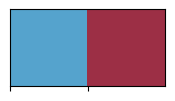

In [ ]:
pal = sns.color_palette('tab10')
print(pal.as_hex())
sns.set_palette(['#55a3cd', '#9c2f45'])
sns.palplot(sns.color_palette())

<Axes: xlabel='X1', ylabel='X2'>

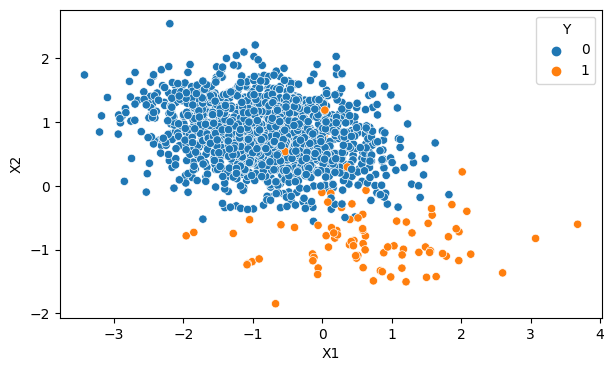

In [ ]:
# Imblanced Data
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4),dpi=100)
sns.despine(left=True)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df)

In [ ]:
df['Y'].value_counts()

0    1527
1      92
Name: Y, dtype: int64

In [ ]:
x = df.drop('Y', axis=1)
y = df['Y']

**SMOTE**

In [ ]:
counter = Counter(y)
print('Before',counter)
smt = SMOTE()
X_train1, y_train1 = smt.fit_resample(x, y)
counter = Counter(y_train1)
print('After',counter)

Before Counter({0: 1527, 1: 92})
After Counter({0: 1527, 1: 1527})


In [ ]:
x = df['Total']
y = df['Oil']

x1,x2,y1,y2 = split(x,y,test_size=0.2)

print('Before',Counter(y1))
X,Y = SMOTE().fit_resample(x1,y1)
print('After',Counter(Y))

Before Counter({9786.860718: 1, 16.534516: 1, 67.527239: 1, 179.217232: 1, 98.697016: 1, 14.735471: 1, 40.507856: 1, 63.02652: 1, 3.890707: 1, 413.496784: 1, 9.369451: 1, 34.08512: 1, 11.618255: 1, 180.26388: 1, 203.764755: 1, 262.705409: 1, 40.010753: 1, 3.322427: 1, 6.874236: 1, 0.865988: 1, 242.578672: 1, 26.72216: 1, 67.927146: 1, 35.035226: 1, 161.533251: 1, 187.698122: 1, 76.763626: 1, 2179.491846: 1, 7.708163: 1, 189.343208: 1, 170.817246: 1, 46.840104: 1, 139.155751: 1, 161.53353: 1, 39.979448: 1, 146.687953: 1, 196.255763: 1, 23.885778: 1, 2358.831137: 1, 34.587851: 1, 69.449059: 1, 331.844462: 1, 23.761772: 1, 28.619567: 1, 2.282585: 1, 19.759136: 1, 234.707759: 1, 261.298548: 1, 5.030321: 1, 10.925651: 1, 2227.464: 1, 9.419466: 1, 24.828674: 1, 32.163171: 1, 84.600078: 1, 9.297181: 1, 260.378249: 1, 9.554102: 1, 18.177857: 1, 2280.456426: 1, 253.652806: 1, 26.024279: 1, 2.15948: 1, 352.402027: 1, 23.99778: 1, 552.298459: 1, 350.052061: 1, 24.39448: 1, 7.570724: 1, 15.220738:

ValueError: ignored